# README

This Notebook was used to generated our final result plots.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from uncertainties import ufloat

In [2]:
rcParams['font.size'] = 26
rcParams['figure.figsize'] = (16,10)

### Load aggregated results of the best models for all classifers form hdf5 file

In [3]:
df = pd.read_hdf('./final_scores.hdf')
df = df.set_index(['DataSet','Classifier','LG']).sort_index()

In [4]:
df.head(15)

Recall FRI                     Precision FRI            \
                            mean       std       sem          mean       std   
DataSet Classifier LG                                                          
Test    CNN        0       0.726  0.015166  0.006782      0.691020  0.041821   
                   1       0.744  0.044497  0.019900      0.716176  0.039825   
                   2       0.774  0.053666  0.024000      0.720023  0.043588   
                   3       0.780  0.056569  0.025298      0.755313  0.030951   
                   5       0.758  0.021679  0.009695      0.719006  0.029004   
        FCN        0       0.452  0.031145  0.013928      0.592240  0.082510   
                   1       0.578  0.050695  0.022672      0.564163  0.037180   
                   2       0.624  0.051284  0.022935      0.587396  0.046997   
                   3       0.540  0.080932  0.036194      0.671618  0.057376   
                   5       0.604  0.078930  0.035299      0.642754  0.023753   
        ViT        0       0.754  0.016733  0.007483      0.729650  0.024533   
                   1       0.726  0.066933  0.029933      0.703978  0.044442   
                   2       0.754  0.024083  0.010770      0.705310  0.045668   
                   3       0.730  0.028284  0.012649      0.703237  0.055972   
                   5       0.702  0.050200  0.022450      0.715395  0.034228   

                                F1Score FRI                     Recall FRII  \
                            sem        mean       std       sem        mean   
DataSet Classifier LG                                                         
Test    CNN        0   0.018703    0.707387  0.020459  0.009150       0.838   
                   1   0.017810    0.729351  0.036662  0.016396       0.854   
                   2   0.019493    0.744836  0.036671  0.016400       0.856   
                   3   0.013842    0.765688  0.017193  0.007689       0.882   
                   5   0.012971    0.737495  0.015082  0.006745       0.834   
        FCN        0   0.036899    0.508784  0.022780  0.010187       0.450   
                   1   0.016627    0.569663  0.030637  0.013701       0.626   
                   2   0.021018    0.602961  0.029223  0.013069       0.710   
                   3   0.025659    0.594743  0.047186  0.021102       0.718   
                   5   0.010622    0.621318  0.051908  0.023214       0.704   
        ViT        0   0.010971    0.741498  0.018275  0.008173       0.912   
                   1   0.019875    0.713896  0.048408  0.021649       0.868   
                   2   0.020423    0.727705  0.021065  0.009421       0.882   
                   3   0.025031    0.715721  0.038244  0.017103       0.880   
                   5   0.015307    0.707977  0.036024  0.016110       0.864   

                       ... F1Score Bent Multiclass_Brier                      \
                       ...          sem             mean       std       sem   
DataSet Classifier LG  ...                                                     
Test    CNN        0   ...     0.011542         0.312987  0.010442  0.004670   
                   1   ...     0.023946         0.306706  0.027915  0.012484   
                   2   ...     0.015943         0.295804  0.028959  0.012951   
                   3   ...     0.013379         0.292802  0.026632  0.011910   
                   5   ...     0.008445         0.297597  0.017440  0.007799   
        FCN        0   ...     0.015325         0.511726  0.009513  0.004255   
                   1   ...     0.011919         0.488390  0.032277  0.014435   
                   2   ...     0.017739         0.456816  0.018231  0.008153   
                   3   ...     0.021142         0.461734  0.024316  0.010874   
                   5   ...     0.016498         0.452228  0.025659  0.011475   
        ViT        0   ...     0.006454         0.324170  0.017865  0.007989   
                   1   ...     0.01380

### Here we evaluate the best models for each Classifer separately and compare the different wGAN-augmented training setups (LG>0) with the baseline (LG=0)

In [5]:
df_acc = df.loc[:, ['DataSet','Classifier','LG','Accuracy']]

In [6]:
df_acc.head()

Accuracy                    
                          mean       std       sem
DataSet Classifier LG                             
Test    CNN        0    0.7895  0.011096  0.004962
                   1    0.7905  0.024457  0.010937
                   2    0.8105  0.025087  0.011219
                   3    0.8135  0.008023  0.003588
                   5    0.8080  0.007786  0.003482

### First: FCN

In [7]:
FCN = df_acc.loc[('Test','FCN')]
FCN['ufloat'] = FCN.apply(lambda x: ufloat(x[('Accuracy', 'mean')],x[('Accuracy', 'std')]),1)
FCN['Change relative to baseline [%]'] = (FCN.loc[:,'ufloat'] / FCN.loc[0, ('ufloat', '')] -1) * 100

In [8]:
FCN

Accuracy                             ufloat Change relative to baseline [%]
       mean       std       sem                                               
LG                                                                            
0    0.5870  0.018490  0.008269  0.587+/-0.018                     (0+/-5)e-16
1    0.6665  0.020047  0.008965  0.666+/-0.020                          14+/-5
2    0.6900  0.017048  0.007624  0.690+/-0.017                          18+/-5
3    0.6860  0.025775  0.011527  0.686+/-0.026                          17+/-6
5    0.6940  0.024148  0.010799  0.694+/-0.024                          18+/-6

### Next: CNN 

In [9]:
CNN = df_acc.loc[('Test','CNN')]
CNN['ufloat'] = CNN.apply(lambda x: ufloat(x[('Accuracy', 'mean')],x[('Accuracy', 'std')]),1)
CNN['Change relative to baseline [%]'] = (CNN.loc[:,'ufloat'] / CNN.loc[0, ('ufloat', '')] -1) * 100

In [10]:
CNN

Accuracy                             ufloat Change relative to baseline [%]
       mean       std       sem                                               
LG                                                                            
0    0.7895  0.011096  0.004962  0.789+/-0.011                         0.0+/-0
1    0.7905  0.024457  0.010937  0.790+/-0.024                       0.1+/-3.4
2    0.8105  0.025087  0.011219  0.810+/-0.025                       2.7+/-3.5
3    0.8135  0.008023  0.003588  0.814+/-0.008                       3.0+/-1.8
5    0.8080  0.007786  0.003482  0.808+/-0.008                       2.3+/-1.7

### Last: ViT

In [11]:
ViT = df_acc.loc[('Test','ViT')]
ViT['ufloat'] = ViT.apply(lambda x: ufloat(x[('Accuracy', 'mean')],x[('Accuracy', 'std')]),1)
ViT['Change relative to baseline [%]'] = (ViT.loc[:,'ufloat'] / ViT.loc[0, ('ufloat', '')] -1) * 100

In [12]:
ViT

Accuracy                             ufloat Change relative to baseline [%]
       mean       std       sem                                               
LG                                                                            
0     0.806  0.009117  0.004077  0.806+/-0.009                         0.0+/-0
1     0.796  0.025775  0.011527  0.796+/-0.026                      -1.2+/-3.4
2     0.800  0.013578  0.006072  0.800+/-0.014                      -0.7+/-2.0
3     0.790  0.025062  0.011208  0.790+/-0.025                      -2.0+/-3.3
5     0.784  0.015268  0.006828  0.784+/-0.015                      -2.7+/-2.2

### We plot the accuary averged over the cross validations for each classifier with data only runs (LG=0) as baseline

In [13]:
def do_plot(df, col, ylabel=None, title=None, ylim=(0,.5)):
    ''' Helper with stuff that is really purely plot related, so most of the changes to plot design should go in here
    '''
    subcols=('mean','std')
    fig, ax = plt.subplots(1,1,figsize=(16,10))
    eb = ax.errorbar([f'$\lambda_{{\mathrm{{gen}}}} = {i}$' for i in df.index[1:]], df.loc[1:,(col,subcols[0])], yerr=df.loc[1:,(col,subcols[1])],
                fmt='o', capsize=10, elinewidth=3, capthick=3)
    ax.set_ylim(*ylim)
    ax.grid(axis='y')
    ax.set_ylabel(ylabel,y=1,ha='right')
    xlims = ax.get_xlim()
    pseudo_x = np.linspace(*xlims, 10)
    mean = df.loc[0,(col,subcols[0])]
    sem = df.loc[0,(col,subcols[1])]
    ax.fill_between(pseudo_x, mean - sem, mean+sem, alpha=.2, color='C1')
    ahline = ax.axhline(mean, color='C1')
    ax.set_xlim(*xlims);
    
    ax.legend([ahline,eb], ['classically augmented', 'classically + wGAN augmented'])
    

    return fig, ax

### ViT Brier and Accuracy on test set

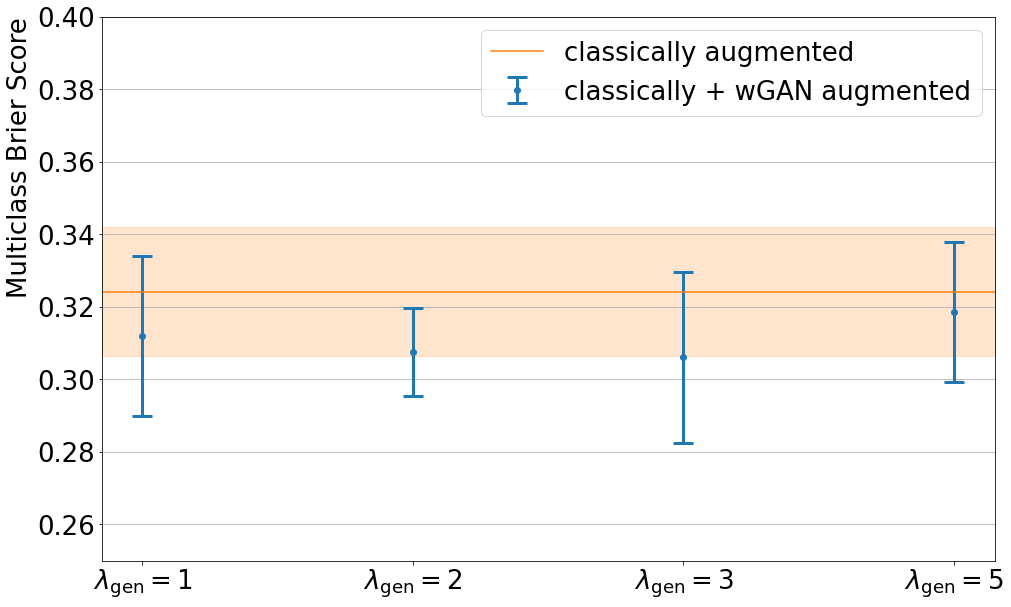

In [14]:
ylim = (0.25,.4)
col = 'Multiclass_Brier'
ylabel = 'Multiclass Brier Score'
classifier = 'ViT'

data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

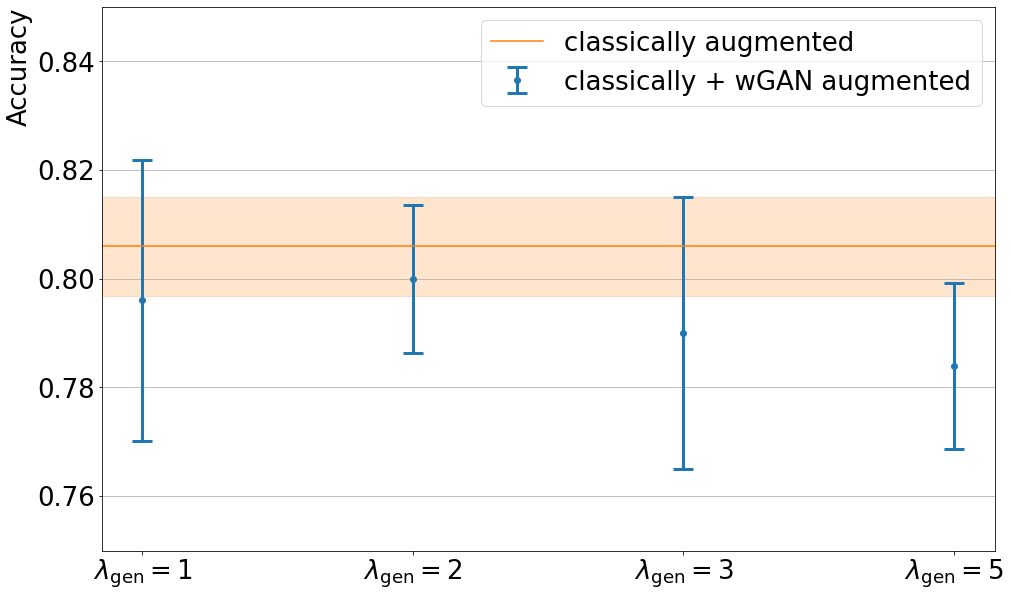

In [15]:
ylim = (0.75,.85)
col = 'Accuracy'
ylabel = 'Accuracy'
classifier = 'ViT'
data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

### CNN Brier on test and validation set

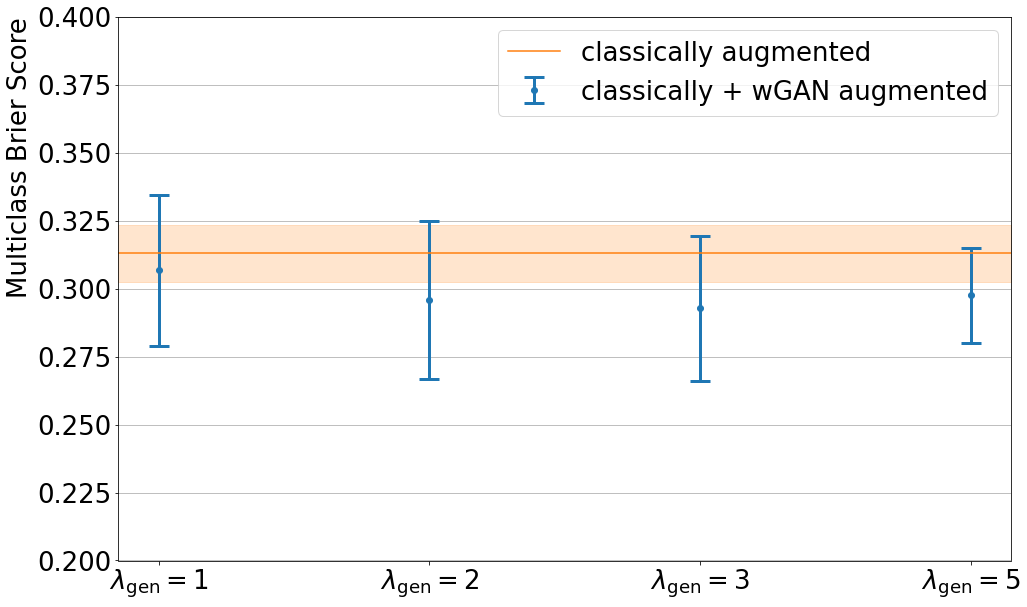

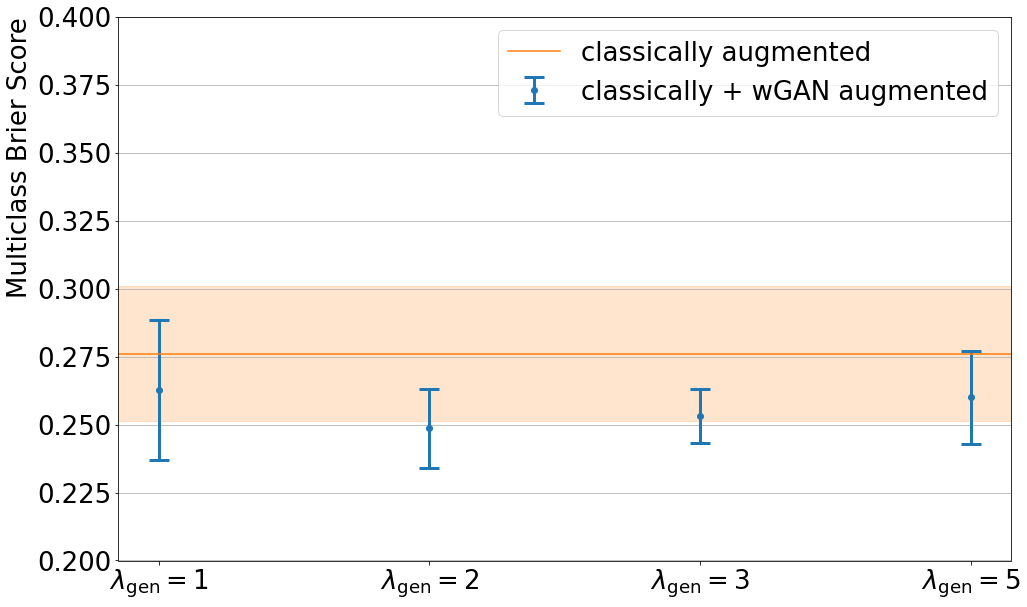

In [16]:
ylim = (.2,.4)
col = 'Multiclass_Brier'
ylabel = 'Multiclass Brier Score'
classifier = 'CNN'
data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

data_set = 'Validation'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);


### CNN Accuracy on test and validation set

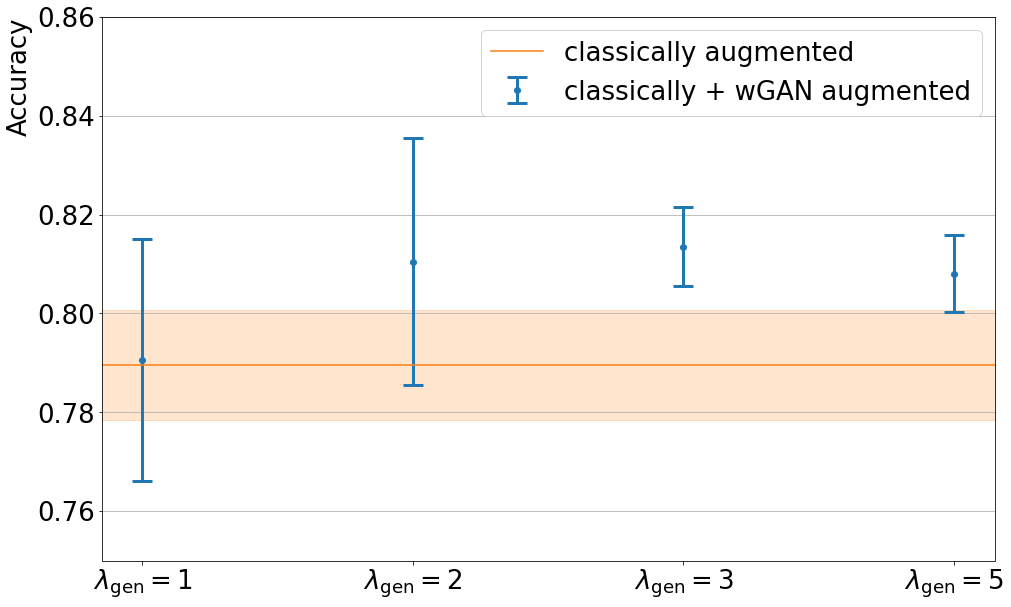

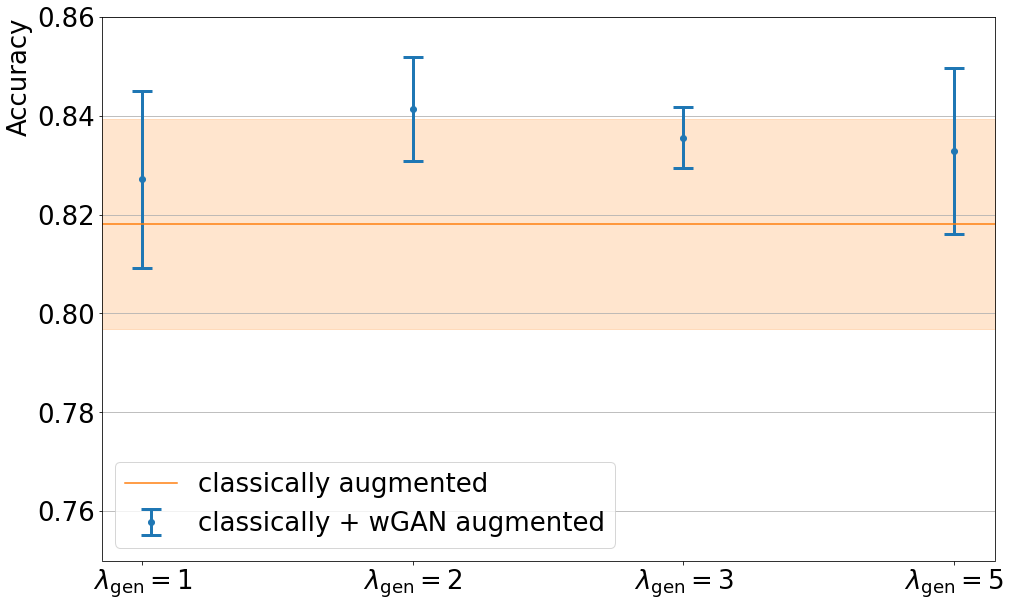

In [17]:
ylim = (.75,.86)
col = 'Accuracy'
ylabel = 'Accuracy'
classifier = 'CNN'

data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

data_set = 'Validation'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

### FCN Accuracy on test and validation set

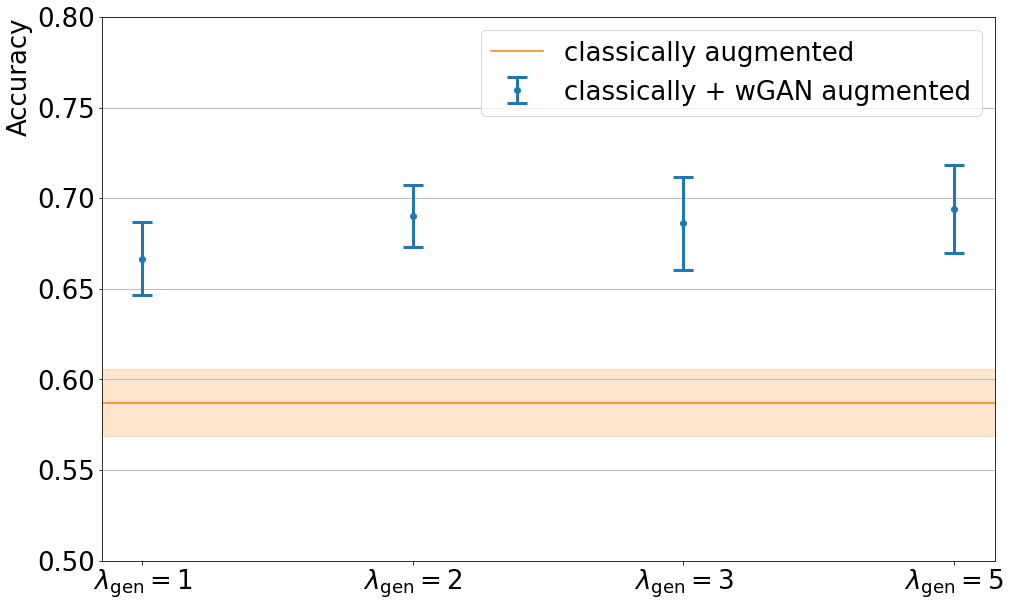

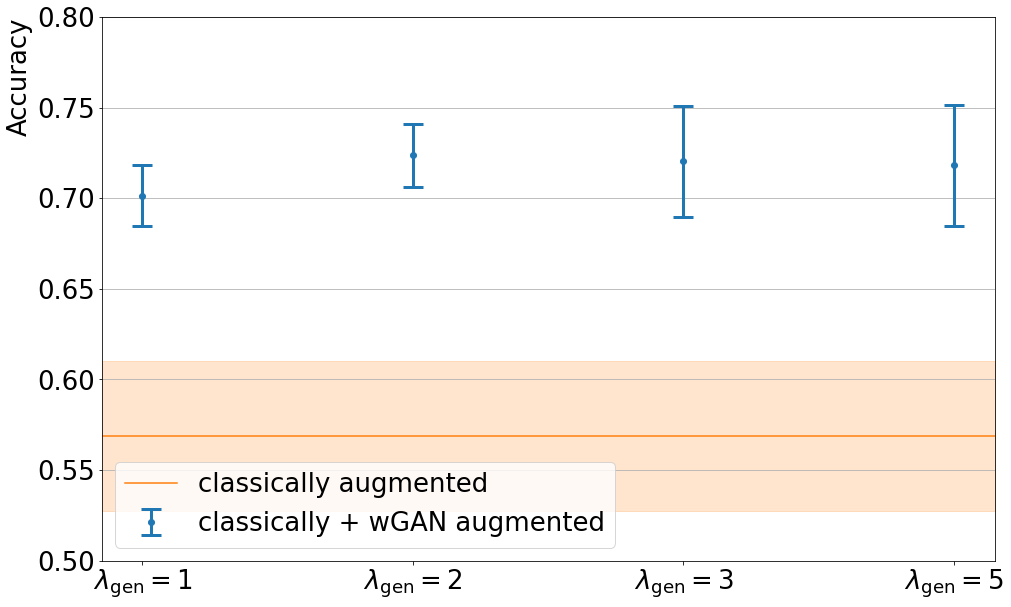

In [18]:
ylim = (0.5,.8)#(.55,.8)
col = 'Accuracy'
ylabel = 'Accuracy'
classifier = 'FCN'

data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

data_set = 'Validation'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

### FCN Brier on test and validation set

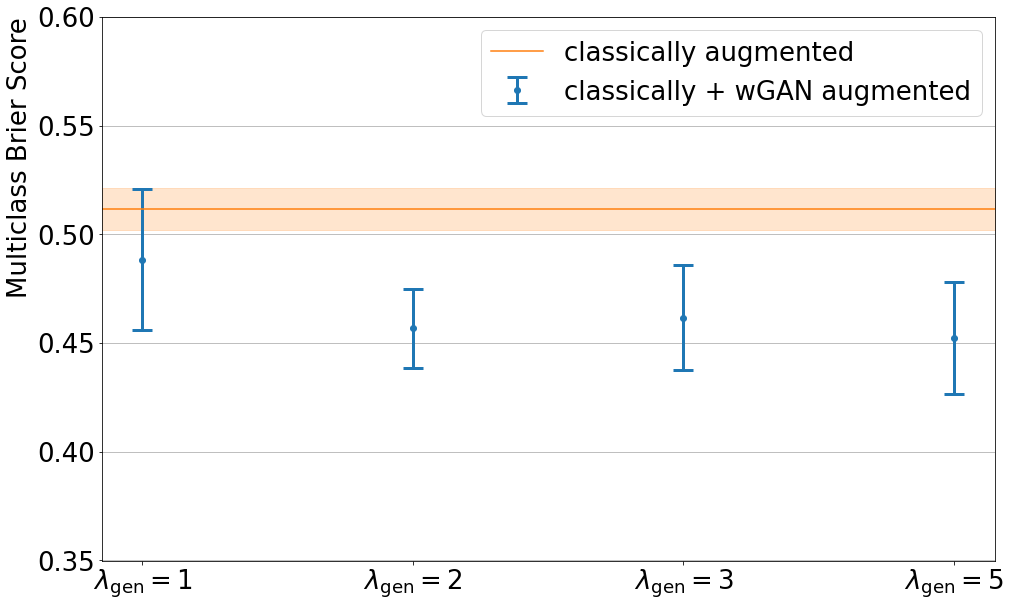

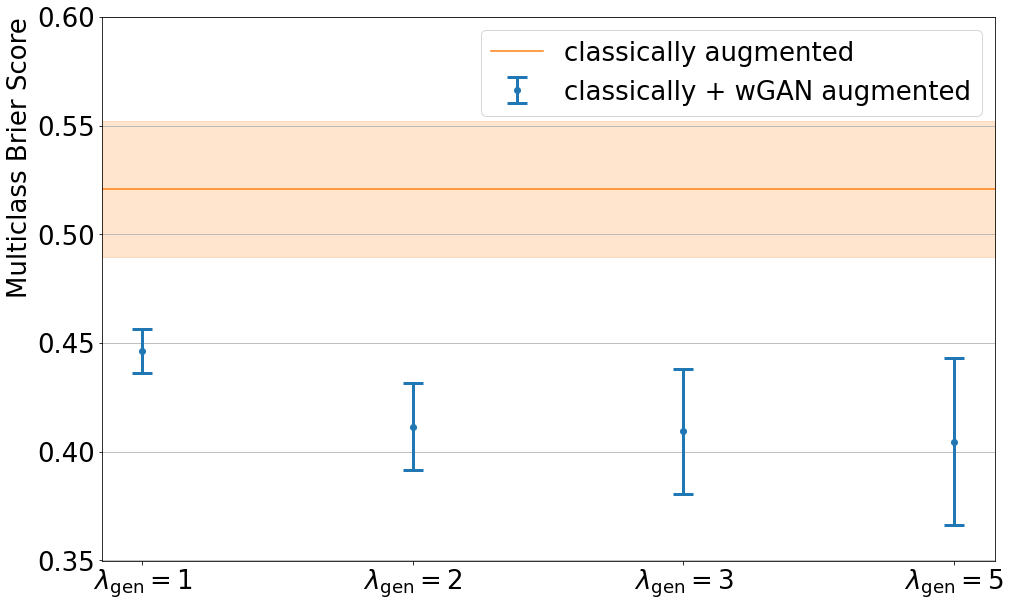

In [19]:
ylim = (0.35,.6)
col = 'Multiclass_Brier'
ylabel = 'Multiclass Brier Score'
classifier = 'FCN'
data_set = 'Test'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

data_set = 'Validation'
do_plot(df.loc[(data_set, classifier)], col, ylabel=ylabel, ylim=ylim);

## Show other metrics (used in appendix)

In [20]:
if not os.path.exists('./Images'):
    os.makedirs('./Images')

In [ ]:
classifiers = ['CNN', 'FCN', 'ViT']
metrics = ['F1Score', 'Precision', 'Recall']
classes = ['FRI', 'FRII', 'Compact', 'Bent']

for classifier in classifiers:
    for metric in metrics:
        fig, ax = plt.subplots()
        curr_df = df.loc[('Test', classifier), :]
        int_ind = range(curr_df.shape[0])
        for class_label in classes:
            y = curr_df.loc[:, (f'{metric} {class_label}', 'mean')]
            yerr = curr_df.loc[:, (f'{metric} {class_label}', 'std')]
            ax.errorbar(int_ind, y, yerr, label=class_label)
        ax.set_xticks(int_ind)
        ax.set_xticklabels([f'$\lambda_\mathrm{{gen}} = {lg}$' for lg in curr_df.index.values] )
        ax.set_ylabel(f'{metric}', ha='right', y=1)
        ax.legend()
        ax.set_ylim([0,1])
        ax.grid(axis='y')
        for ind in int_ind[:-1]:
            ax.axvline(ind + .5, color='gray',linestyle='dashed')
        ax.set_xlim([-0.5,4.5])
        ax.set_title(classifier)
        plt.tight_layout()
        fig.savefig(f'./Images/Test_{classifier}_{metric}.pdf')
